In [40]:
import os
import shutil

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

from utils import augment_images, create_model_v2, flatten_datasets, create_model
from config import config

import pandas as pd

In [91]:
flag = 1

models = {
    1: {
        "base_model": tf.keras.applications.MobileNetV3Small(
            weights="imagenet",
            input_shape=config["input_shape"],
            include_top=False,
            pooling="avg",
        ),
        "model_name": "mobilenetv3small",
    },
    2: {
        "base_model": tf.keras.applications.EfficientNetV2B0(
            weights="imagenet",
            input_shape=config["input_shape"],
            include_top=False,
            pooling="avg",
        ),
        "model_name": "efficientnetv2b0",
    },
}

base_model = models[flag]["base_model"]
model_name = models[flag]["model_name"]

In [92]:
model_00_fold1 = pd.read_csv(f"results/dropout_tests/{model_name}/0.0/fold_1.csv")
model_00_fold2 = pd.read_csv(f"results/dropout_tests/{model_name}/0.0/fold_2.csv")
model_00_mean_loss = (model_00_fold1["loss"] + model_00_fold2["loss"]) / 2
model_00_mean_val_loss = (model_00_fold1["val_loss"] + model_00_fold2["val_loss"]) / 2

model_01_fold1 = pd.read_csv(f"results/dropout_tests/{model_name}/0.1/fold_1.csv")
model_01_fold2 = pd.read_csv(f"results/dropout_tests/{model_name}/0.1/fold_2.csv")
model_01_mean_loss = (model_01_fold1["loss"] + model_01_fold2["loss"]) / 2
model_01_mean_val_loss = (model_01_fold1["val_loss"] + model_01_fold2["val_loss"]) / 2

model_02_fold1 = pd.read_csv(f"results/dropout_tests/{model_name}/0.2/fold_1.csv")
model_02_fold2 = pd.read_csv(f"results/dropout_tests/{model_name}/0.2/fold_2.csv")
model_02_mean_loss = (model_02_fold1["loss"] + model_02_fold2["loss"]) / 2
model_02_mean_val_loss = (model_02_fold1["val_loss"] + model_02_fold2["val_loss"]) / 2

model_03_fold1 = pd.read_csv(f"results/dropout_tests/{model_name}/0.3/fold_1.csv")
model_03_fold2 = pd.read_csv(f"results/dropout_tests/{model_name}/0.3/fold_2.csv")
model_03_mean_loss = (model_03_fold1["loss"] + model_03_fold2["loss"]) / 2
model_03_mean_val_loss = (model_03_fold1["val_loss"] + model_03_fold2["val_loss"]) / 2

model_04_fold1 = pd.read_csv(f"results/dropout_tests/{model_name}/0.4/fold_1.csv")
model_04_fold2 = pd.read_csv(f"results/dropout_tests/{model_name}/0.4/fold_2.csv")
model_04_mean_loss = (model_04_fold1["loss"] + model_04_fold2["loss"]) / 2
model_04_mean_val_loss = (model_04_fold1["val_loss"] + model_04_fold2["val_loss"]) / 2

model_05_fold1 = pd.read_csv(f"results/dropout_tests/{model_name}/0.5/fold_1.csv")
model_05_fold2 = pd.read_csv(f"results/dropout_tests/{model_name}/0.5/fold_2.csv")
model_05_mean_loss = (model_05_fold1["loss"] + model_05_fold2["loss"]) / 2
model_05_mean_val_loss = (model_05_fold1["val_loss"] + model_05_fold2["val_loss"]) / 2

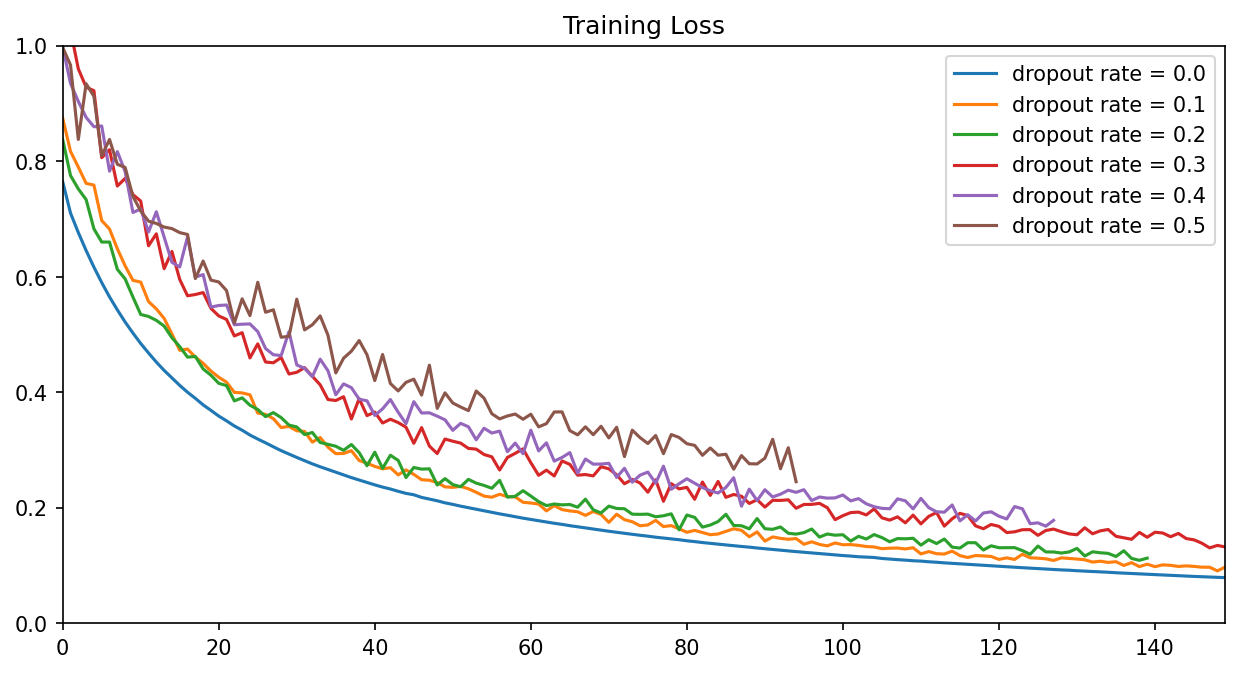

In [93]:
ax, fig = plt.subplots(figsize=(10, 5), dpi=150)

model_00_mean_loss.plot(x="epoch", y="loss", ax=fig, label="dropout rate = 0.0")
model_01_mean_loss.plot(x="epoch", y="loss", ax=fig, label="dropout rate = 0.1")
model_02_mean_loss.plot(x="epoch", y="loss", ax=fig, label="dropout rate = 0.2")
model_03_mean_loss.plot(x="epoch", y="loss", ax=fig, label="dropout rate = 0.3")
model_04_mean_loss.plot(x="epoch", y="loss", ax=fig, label="dropout rate = 0.4")
model_05_mean_loss.plot(x="epoch", y="loss", ax=fig, label="dropout rate = 0.5")

plt.title("Training Loss")
plt.xlim(0, 149)
plt.ylim(0, 1.0)
plt.legend()
plt.show()

In [104]:
model = create_model(base_model, config)

dropout = "0.5"
fold_num = 1
checkpoints_path = f"checkpoints/dropout_tests/{model_name}/{dropout}/fold_{fold_num}"
latest_checkpoint = tf.train.latest_checkpoint(checkpoints_path)

model.load_weights(latest_checkpoint)

3/3 [==============================] - 1s 132ms/step


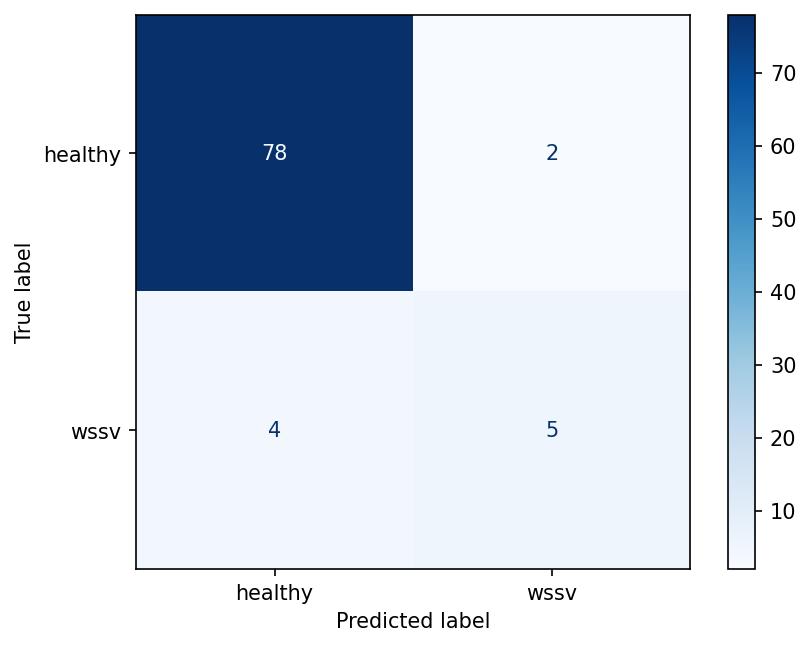

: 

In [105]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1).tolist()

plt.rc("font", family="sans-serif")
plt.rcParams["figure.dpi"] = 150

cm = confusion_matrix(test_labels.argmax(axis=1), predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()